In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%run My_function.ipynb

<div class="oc-richContent root-0-2-1" data-videotitle="video" data-current-user-id="328418" data-project-id="863" data-codio-button-label="Accéder au code"><p>&nbsp;</p>
<p><img src="https://user.oc-static.com/upload/2023/03/15/16788718737642_Banner-Sce%CC%81nario.png" alt="Bannière scénario"></p>

<p>Vous êtes consultant Data Analyst dans une entreprise spécialisée dans la data. Votre entreprise a décroché une prestation en régie au sein de l’Organisation nationale de lutte contre le faux-monnayage (ONCFM).</p>
<p>&nbsp;</p>
<figure><a href="https://user.oc-static.com/upload/2020/11/25/16063163322759_Screen%20Shot%202020-11-05%20at%2011.15.15.png" class="oc-imageLink oc-imageLink--disabled"><img src="https://user.oc-static.com/upload/2020/11/25/16063163322759_Screen%20Shot%202020-11-05%20at%2011.15.15.png" alt=""></a></figure>
<p>&nbsp;</p>
<p>Cette institution a pour objectif de mettre en place des méthodes d’identification des contrefaçons des billets en euros. Ils font donc appel à vous, spécialiste de la data, pour mettre en place une modélisation qui serait capable d’identifier automatiquement les vrais des faux billets. Et ce à partir simplement de certaines dimensions du billet et des éléments qui le composent.</p>
<p>Voici <a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P10-cdc-detection-faux-billets.pdf">le cahier des charges de l’ONCFM</a>, ainsi que&nbsp;<a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/billets.csv">le jeu de données</a>.</p>
<p>Le client souhaite que vous travailliez directement depuis ses locaux sous la responsabilité de Marie, responsable du projet d’analyse de données à l’ONCFM. Elle vous laissera une grande autonomie pendant votre mission, et vous demande simplement que vous lui présentiez vos résultats une fois la mission terminée. Elle souhaite voir quels sont les traitements et analyses que vous avez réalisés en amont, les différentes pistes explorées pour la construction de l’algorithme, ainsi que le modèle final retenu.</p>
<p>Après avoir lu en détail le cahier des charges, vous vous préparez à vous rendre à l’ONCFM pour prendre vos nouvelles fonctions. Vous notez tout de même un post-it qui se trouve sur le coin de votre bureau, laissé par un de vos collègues :</p>
<figure><a href="https://user.oc-static.com/upload/2020/11/25/16063165227448_De%CC%81tectez%20des%20faux%20billets%20-%20post%20it.png" class="oc-imageLink oc-imageLink--disabled"><img src="https://user.oc-static.com/upload/2020/11/25/16063165227448_De%CC%81tectez%20des%20faux%20billets%20-%20post%20it.png" alt="Lors de ma précédente mission, je me suis retrouvé avec un jeu de données comportant plein de valeurs manquantes, une vraie galère&nbsp;! Mais j’ai eu de très bons résultats en utilisant une régression linéaire pour combler ces dernières. Ça te servira peut-être pour ta prochaine mission, qui sait&nbsp;?"></a></figure>
<p>Vous embarquez le post-it dans vos affaires et vous dirigez donc à présent vers les bureaux de l’ONCFM pour commencer votre mission.</p>

<p><img src="https://user.oc-static.com/upload/2023/03/15/16788719253125_Banner-Livrables.png" alt="Bannière livrables"></p>

<ul>
<li>Votre code en R ou Python contenant :&nbsp;</li>
<ul>
<li>l’ensemble des traitements et des tests effectués ;</li>
<li>l’application finale.</li>
</ul>
</ul>
<aside data-claire-semantic="information">
<p>Pour faciliter votre passage devant le jury, déposez sur la plateforme, dans un dossier zip nommé “<strong><em>Titre_du_projet_nom_prénom</em></strong>”, le livrable du projet nommé comme suit : <strong>Nom</strong>_<strong>Prénom</strong>_<strong>n° du livrable</strong>_<strong>nom du livrable</strong>_<strong>date de démarrage du projet</strong>. Cela donnera :&nbsp;</p>
<ul>
<li><em>Nom_Prénom_1_code_mmaaaa</em></li>
</ul>
<p>Par exemple, le livrable peut être nommé comme suit <em>: Dupont_Jean_1_code</em>_<em>012023.</em></p>
</aside>

<p><img src="https://user.oc-static.com/upload/2023/03/15/16788719600459_Banner-Soutenance.png" alt="Bannière soutenance"></p>
<p>Durant la présentation orale, votre mentor jouera le rôle de Marie, la responsable du projet à l’ONCFM à qui vous présentez vos résultats :&nbsp;</p>
<ul>
<li><strong>Présentation des livrables (20 minutes)&nbsp;</strong>
<ul>
<li>Présentation de l’ensemble de votre cheminement, des traitements et analyses réalisés en amont, des différentes pistes explorées pour la construction de l’algorithme, et du modèle final retenu (15 minutes) ;</li>
<li>Test de l’algorithme en direct avec un jeu de données qui vous sera fourni pendant la soutenance, ayant la même forme que le jeu suivant : <a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/billets_production.csv">FICHIER billets_production.csv</a>&nbsp;(5&nbsp;minutes).</li>
</ul>
</li>
<li><strong>Discussion (5 minutes)</strong>
<ul>
<li>Échange de questions/réponses : l’évaluateur pourra revenir sur certains points pour vous questionner sur vos choix.</li>
<li>L’évaluateur vous fera un retour sur votre prestation en soutenance.</li>
</ul>
</li>
<li><strong>Debriefing (5 minutes)</strong></li>
<ul>
<li>À la fin de la soutenance, l'évaluateur arrêtera de jouer le rôle de Marie pour vous permettre de débriefer ensemble.</li>
</ul>
</ul>


# Récupération des données

In [3]:
data = pd.read_csv("Données/billets.csv",sep=";")

# Exploration des données

## Exploration

In [4]:
data.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

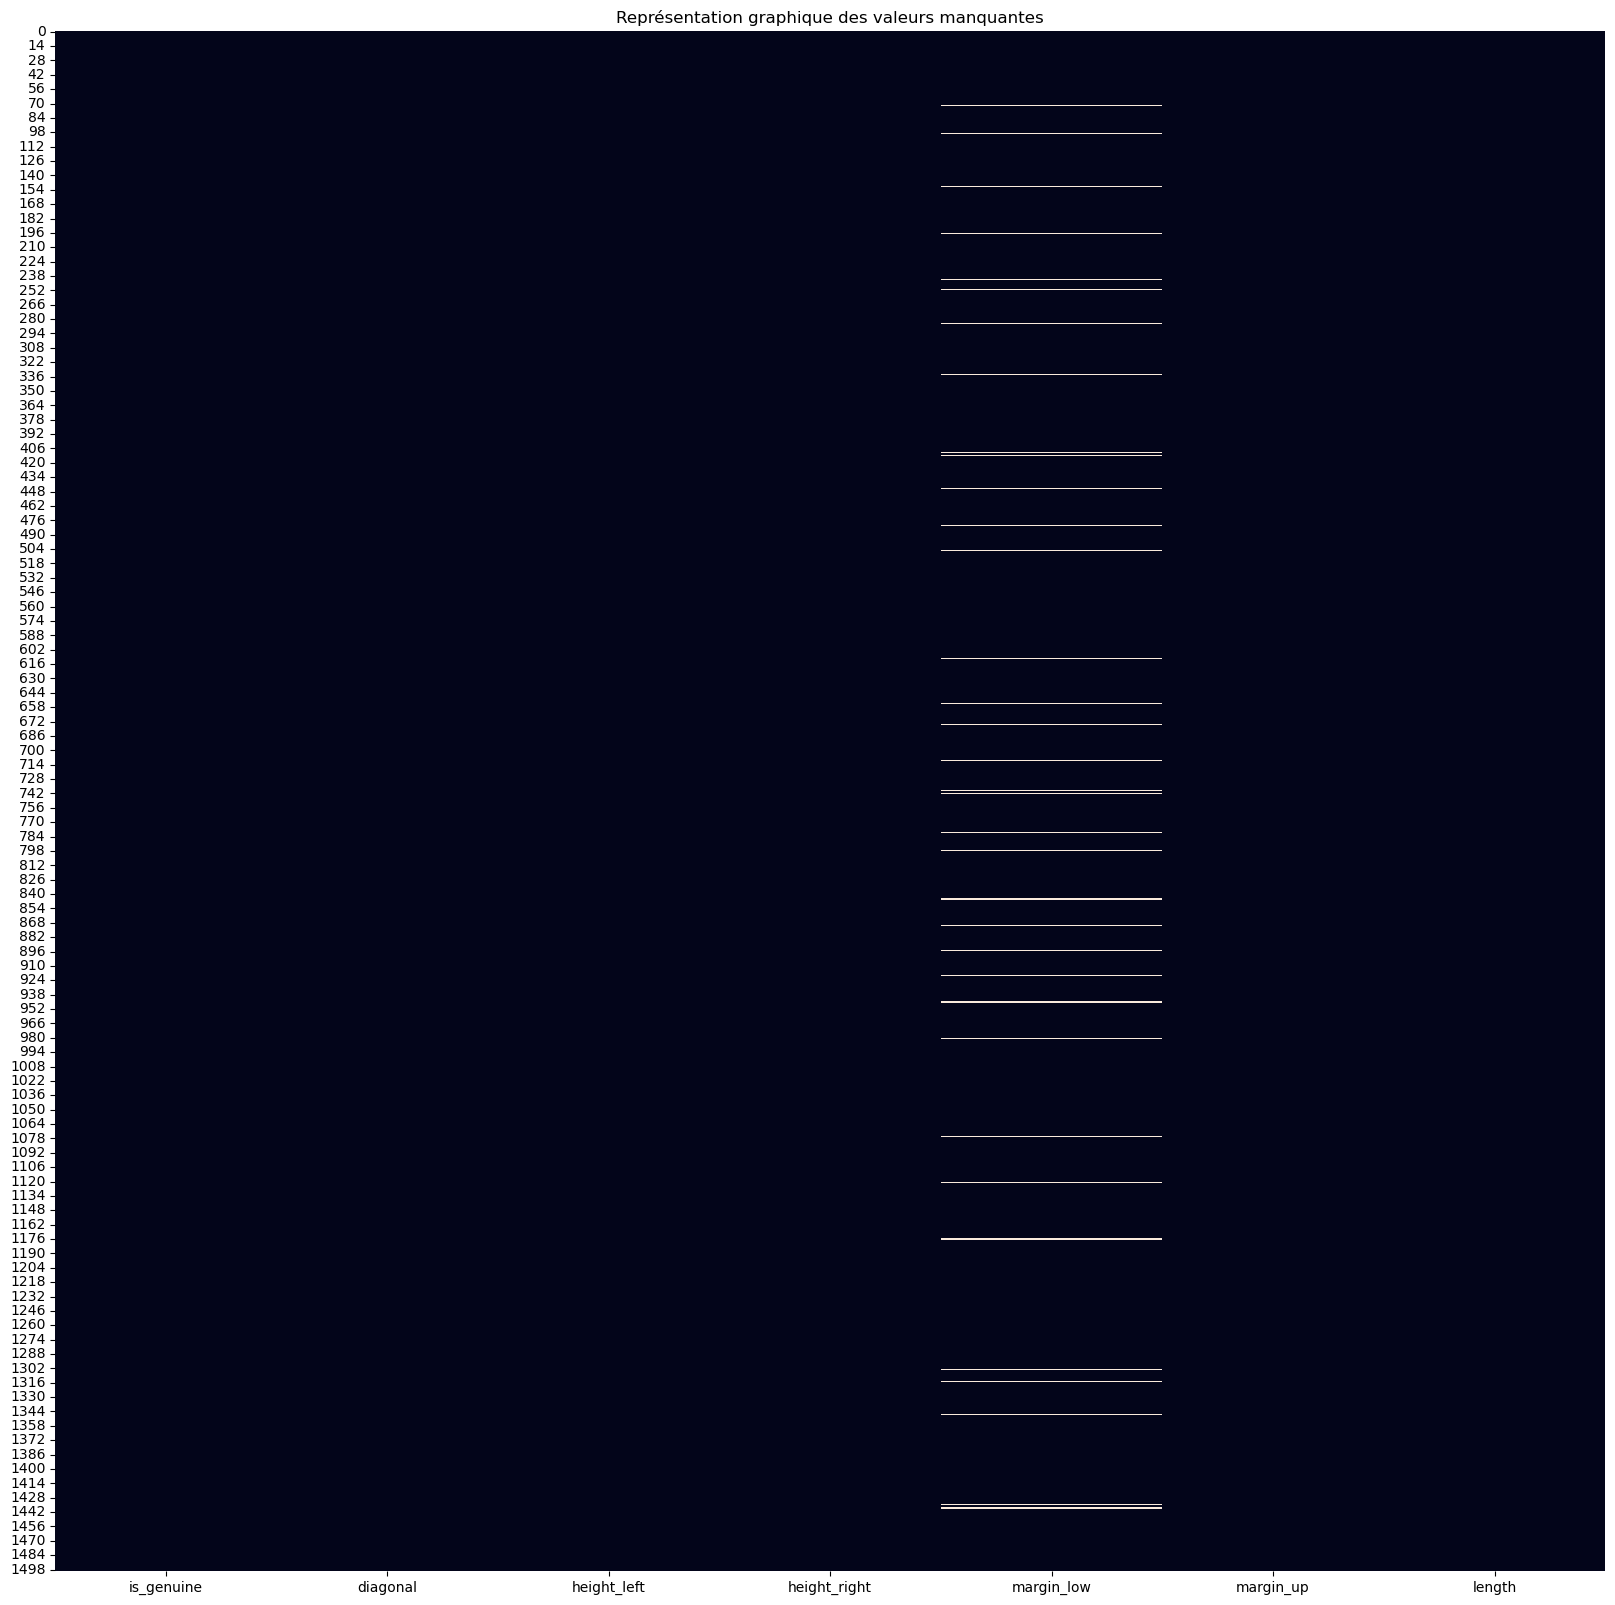

observations  variables     type    moyennes  medianes  \
is_genuine            1500          7     bool    0.666667      1.00   
diagonal              1500          7  float64  171.958440    171.96   
height_left           1500          7  float64  104.029533    104.04   
height_right          1500          7  float64  103.920307    103.92   
margin_low            1500          7  float64    4.485967      4.31   
margin_up             1500          7  float64    3.151473      3.14   
length                1500          7  float64  112.678500    112.96   

              ecart_types     min     max  nb_valeurs_manquantes  \
is_genuine       0.471562   False    True                      0   
diagonal         0.305195  171.04  173.01                      0   
height_left      0.299462  103.14  104.88                      0   
height_right     0.325627  102.82  104.95                      0   
margin_low       0.663813    2.98     6.9                     37   
margin_up        0.231813    2.27    3.91                      0   
length           0.872730  109.49  114.44                      0   

              %_valeurs_manquantes  
is_genuine                    0.00  
diagonal                      0.00  
height_left                   0.00  
height_right                  0.00  
margin_low                    2.47  
margin_up                     0.00  
length                        0.00

In [5]:
# On réalise une rapide analyse de nos données. On constate qu'il y a des valeurs manquantes dans la colonnes margin_low
my_first_analyse(data, graphique=True)

In [6]:
# Vérification du nombre de faux billets
print("Le nombre de vrai billets est de :",data.loc[data["is_genuine"]==True]["is_genuine"].count())
print("Le nombre de faux billets est de :",data.loc[data["is_genuine"]==False]["is_genuine"].count())

Le nombre de vrai billets est de : 1000
Le nombre de faux billets est de : 500


In [7]:
print("Information concernant les vrais billets :")
my_exploration(data.loc[data["is_genuine"]==True])
print("Information concernant les faux billets :")
my_exploration(data.loc[data["is_genuine"]==False])

Information concernant les vrais billets :


diagonal  height_left  height_right  margin_low   margin_up  \
count  1000.000000  1000.000000    1000.00000  971.000000  1000.00000   
mean    171.987080   103.949130     103.80865    4.116097     3.05213   
std       0.300441     0.300231       0.29157    0.319124     0.18634   
min     171.040000   103.140000     102.82000    2.980000     2.27000   
25%     171.790000   103.740000     103.61000    3.905000     2.93000   
50%     171.990000   103.950000     103.81000    4.110000     3.05000   
75%     172.200000   104.140000     104.00000    4.340000     3.18000   
max     172.920000   104.860000     104.95000    5.040000     3.74000   

            length  
count  1000.000000  
mean    113.202430  
std       0.359552  
min     111.760000  
25%     112.950000  
50%     113.205000  
75%     113.460000  
max     114.440000

Information concernant les faux billets :


diagonal  height_left  height_right  margin_low   margin_up  \
count  500.000000   500.000000    500.000000  492.000000  500.000000   
mean   171.901160   104.190340    104.143620    5.215935    3.350160   
std      0.306861     0.223758      0.270878    0.553531    0.180498   
min    171.040000   103.510000    103.430000    3.820000    2.920000   
25%    171.690000   104.040000    103.950000    4.840000    3.220000   
50%    171.910000   104.180000    104.160000    5.190000    3.350000   
75%    172.092500   104.332500    104.320000    5.592500    3.472500   
max    173.010000   104.880000    104.950000    6.900000    3.910000   

           length  
count  500.000000  
mean   111.630640  
std      0.615543  
min    109.490000  
25%    111.200000  
50%    111.630000  
75%    112.030000  
max    113.850000

In [8]:
# On calcule la différence de diagonale entre les vrais et les faux billets
diff_diag = (((data.loc[data["is_genuine"]==True]["diagonal"].mean())-(data.loc[data["is_genuine"]==False]["diagonal"].mean()))/(data.loc[data["is_genuine"]==True]["diagonal"].mean()))*100

# On calcule la différence de hauteur entre les vrais et les faux billets
diff_h_left = (((data.loc[data["is_genuine"]==True]["height_left"].mean())-(data.loc[data["is_genuine"]==False]["height_left"].mean()))/(data.loc[data["is_genuine"]==True]["height_left"].mean()))*100
diff_h_right = (((data.loc[data["is_genuine"]==True]["height_right"].mean())-(data.loc[data["is_genuine"]==False]["height_right"].mean()))/(data.loc[data["is_genuine"]==True]["height_right"].mean()))*100

# On calcule la différence de marge entre les vrais et les faux billets
diff_m_low = (((data.loc[data["is_genuine"]==True]["margin_low"].mean())-(data.loc[data["is_genuine"]==False]["margin_low"].mean()))/(data.loc[data["is_genuine"]==True]["margin_low"].mean()))*100
diff_m_up = (((data.loc[data["is_genuine"]==True]["margin_up"].mean())-(data.loc[data["is_genuine"]==False]["margin_up"].mean()))/(data.loc[data["is_genuine"]==True]["margin_up"].mean()))*100

# On calcule la différence de longeur entre les vrais et les faux billets
diff_length = (((data.loc[data["is_genuine"]==True]["length"].mean())-(data.loc[data["is_genuine"]==False]["length"].mean()))/(data.loc[data["is_genuine"]==True]["length"].mean()))*100

# Affichage des résultats sous forme de Tableau
pd.DataFrame(index=["Moyenne des écrats en %"],columns=["diagonale","height_left","height_right","margin_low","margin_up","length"],data=[[diff_diag, diff_h_left, diff_h_right, diff_m_low, diff_m_up, diff_length]])

diagonale  height_left  height_right  margin_low  \
Moyenne des écrats en %   0.049957    -0.232046      -0.32268  -26.720415   

                         margin_up    length  
Moyenne des écrats en %  -9.764656  1.388477

En comparant les données ci-dessus, on constate que : 
- Les vrais billets ont une diagonale légèrement plus importante
- Les faux billets ont hauteur et des marges lègèrement plus importante
- Les faux billets sont plus petit que les vrais billets.

## Visualisation des données

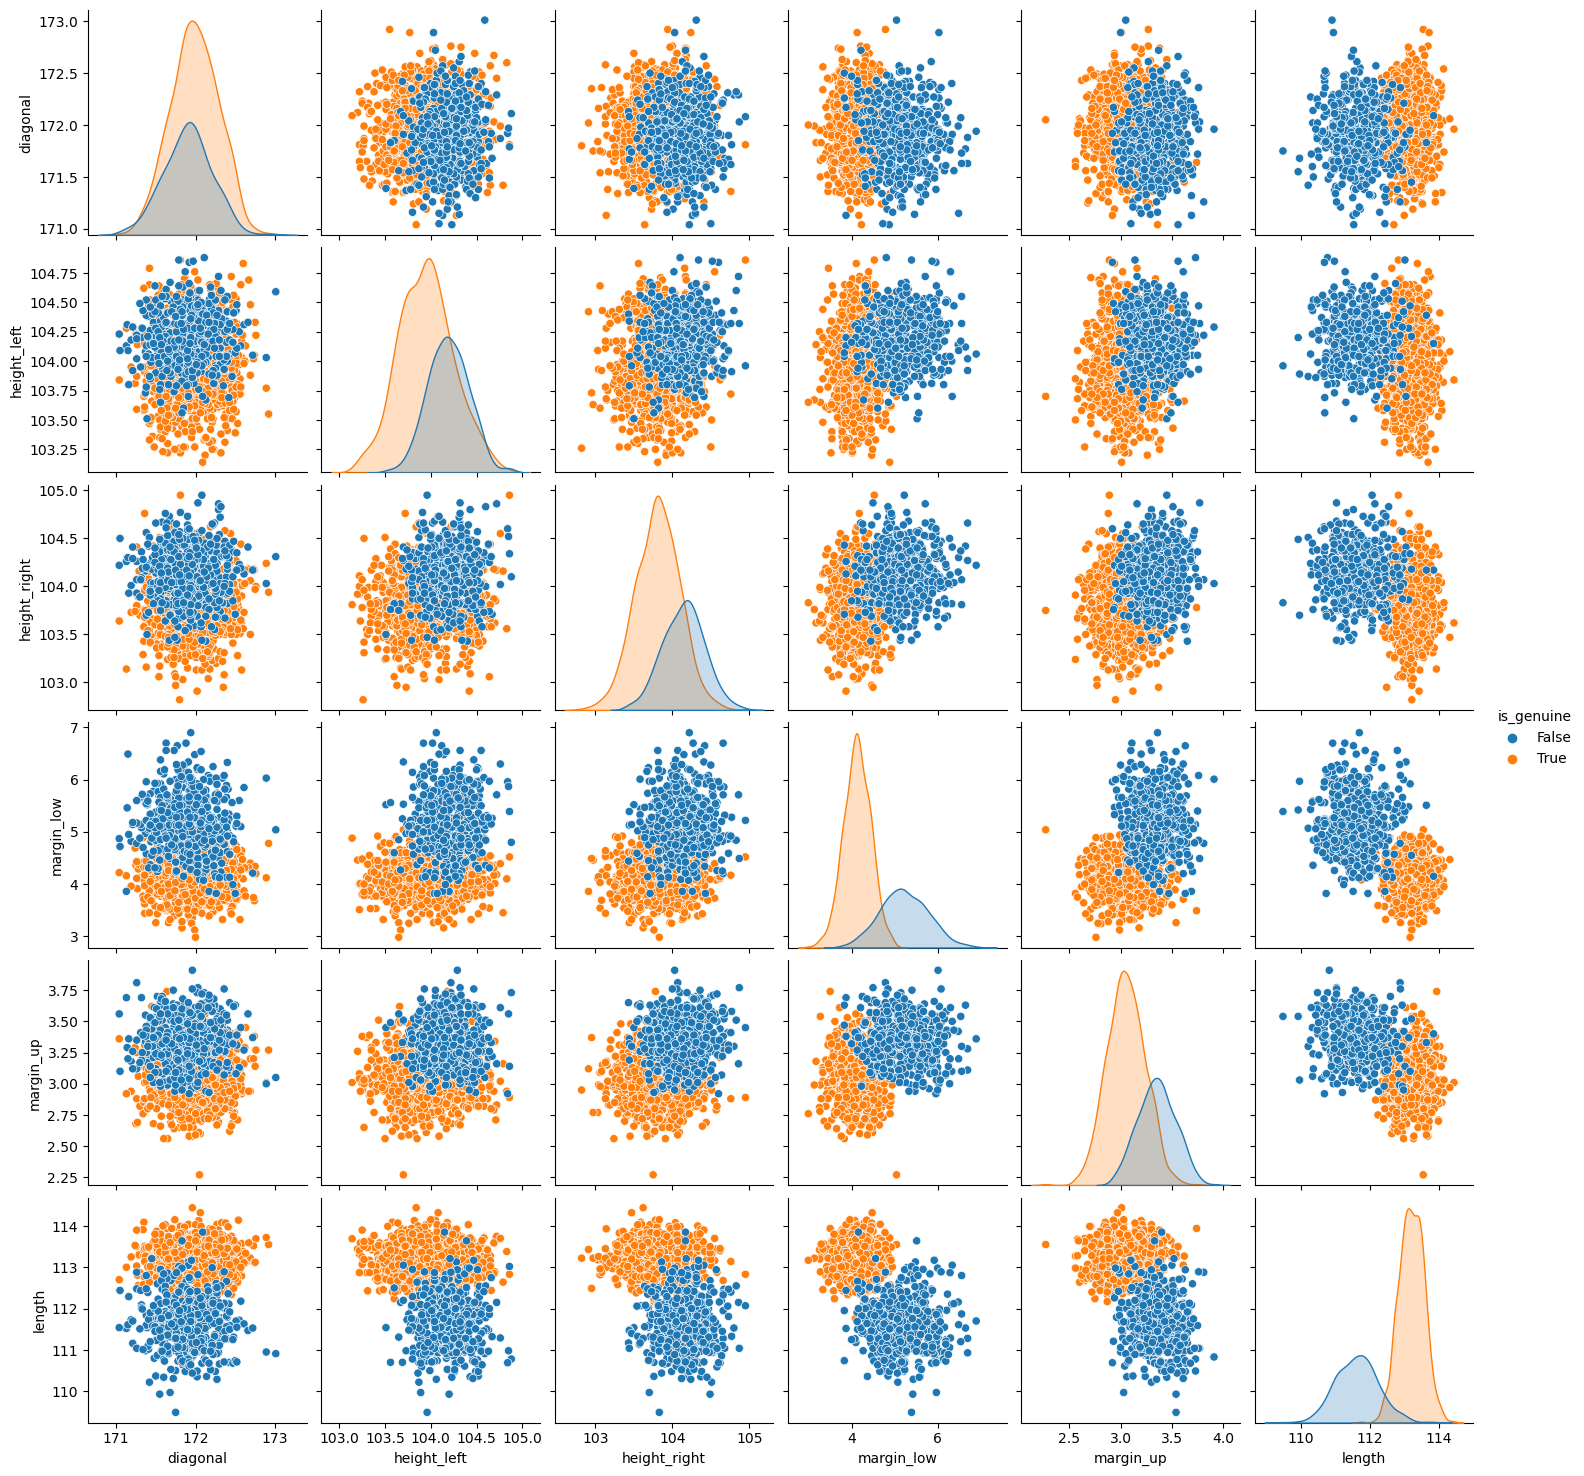

In [9]:
sns.pairplot(data, hue="is_genuine")

In [10]:
my_boxplots(data)

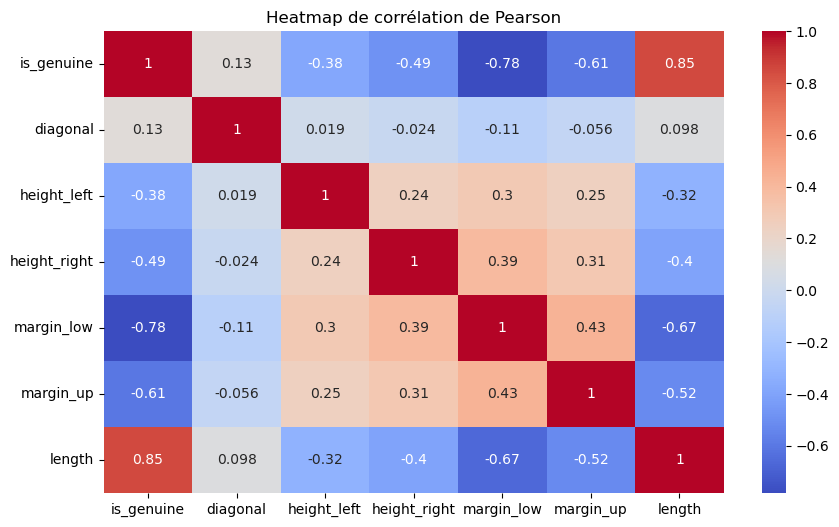

In [11]:
my_corr_heatmap(data)

# Nettoyage des données

In [12]:
# Commençons par changer le bool par du binaire pour la colonne is_genuine
data["is_genuine"].replace([True, False], [1,0], inplace=True)

On va maintenant s'occuper des valeurs manquantes. En observant le pairplot précédent, on constate qu'il semble exister une relation entre la longeur et le margin_low. Plusieurs méthodes s'offrent à nous : 
- Supprimer ces individus (car ne représente (que) 2,47% des valeurs totales)
- Appliquer la moyenne 
- Appliquier la médianne
- Utiliser une methode me ML pour reconstituer ces données (ici, régression linéaire)

Pour ce cas pratique, nous allons opter pour la dernière méthode. 

## Vérification des valeurs abérantess

Nous allons vérifier les données abérantes :

In [13]:
my_outliers_zscore(data)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
251            1    171.80       103.26        102.82         NaN       2.95   
522            1    172.02       104.42        102.91        3.86       3.12   
664            1    172.05       103.70        103.75        5.04       2.27   
729            1    171.04       103.84        103.64        4.22       3.36   
828            1    172.92       103.55        103.94        4.78       3.27   
842            1    172.89       103.77        104.24        4.12       3.01   
1022           0    172.89       104.03        104.03        6.03       3.00   
1029           0    171.96       104.29        104.03        6.01       3.91   
1082           0    171.75       103.96        103.83        5.39       3.54   
1142           0    171.04       104.23        104.22        4.87       3.56   
1277           0    173.01       104.59        104.31        5.04       3.05   
1355           0    171.68       103.89        103.70        5.97       3.03   
1453           0    171.55       104.20        104.49        5.42       3.54   
1484           0    172.08       103.96        104.95        5.22       3.45   

      length  
0     112.83  
251   113.22  
522   113.43  
664   113.55  
729   112.70  
828   113.55  
842   113.72  
1022  110.95  
1029  110.83  
1082  109.49  
1142  111.54  
1277  110.91  
1355  109.97  
1453  109.93  
1484  112.07

Les données aberrantes ont une influence fortes sur les différentes modele ML que nous allons mettre en place. De ce fait, nous pourrions rétiere ces valeurs. 
Cependant, il est interessant de laisser les vrais billets dans le DataSet afin de prendre en compte ces dimentions dans la détection de faux billets. Nous allons simplement retirer les faux billets des outliers

In [14]:
# On affecte les outliers à une variable
outliers = my_outliers_zscore(data)
# On selectionne les vrais billets
outliers = outliers.loc[outliers["is_genuine"]==True]

In [15]:
# On réalise une petite analyse des données outliers
my_first_analyse(outliers)

observations  variables     type    moyennes  medianes  \
is_genuine               7          7    int64    1.000000      1.00   
diagonal                 7          7  float64  172.075714    172.02   
height_left              7          7  float64  103.914286    103.77   
height_right             7          7  float64  103.750000    103.75   
margin_low               7          7  float64    4.423333      4.37   
margin_up                7          7  float64    2.981429      3.01   
length                   7          7  float64  113.285714    113.43   

              ecart_types     min     max  nb_valeurs_manquantes  \
is_genuine       0.000000    1.00    1.00                      0   
diagonal         0.658150  171.04  172.92                      0   
height_left      0.545156  103.26  104.86                      0   
height_right     0.741485  102.82  104.95                      0   
margin_low       0.439894    3.86    5.04                      1   
margin_up        0.356391    2.27    3.36                      0   
length           0.388195  112.70  113.72                      0   

              %_valeurs_manquantes  
is_genuine                    0.00  
diagonal                      0.00  
height_left                   0.00  
height_right                  0.00  
margin_low                   14.29  
margin_up                     0.00  
length                        0.00

In [16]:
# On créé une nouvelle table sans les outliers
data = data.drop(outliers.index, axis=0)

In [17]:
data

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1              1    171.46       103.36        103.66        3.77       2.99   
2              1    172.69       104.48        103.50        4.40       2.94   
3              1    171.36       103.91        103.94        3.62       3.01   
4              1    171.73       104.28        103.46        4.04       3.48   
5              1    172.17       103.74        104.08        4.42       2.95   
...          ...       ...          ...           ...         ...        ...   
1495           0    171.75       104.38        104.17        4.42       3.09   
1496           0    172.19       104.63        104.44        5.27       3.37   
1497           0    171.80       104.01        104.12        5.51       3.36   
1498           0    172.06       104.28        104.06        5.17       3.46   
1499           0    171.47       104.15        103.82        4.63       3.37   

      length  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
5     112.81  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1493 rows x 7 columns]

## Compléter les valeurs manquantes

### Régression Linéaire

On a constaté durant l'exploration des données que nous avions des valeurs manquantes dans la colonne "Margin_low".
Nous souhaitons pouvoir "prédire" ces données à l'aide d'un model de Machine Learning. Dans notre cas, nous allons tester le model de <b>Régression Linéaire</b>.

In [18]:
# On importe LinearRegression()
# Avec Sklearn
from sklearn.linear_model import LinearRegression

# Avec StatModel
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

On va commencer par séparer les individus qui ont une valeur manquante dans "Margin_low". Cela correspond à 37 individus. 

In [19]:
# On créé un Dataset avec les individus qui ont un marhin_low = NaN
data_vide = data.loc[data["margin_low"].isna()]

# On créé un Dataset sans les valeurs manquantes
data_non_vide = data.dropna()

#### Avec StatModels

###### Backward Regression

In [20]:
# On utilise la fonction my_backward_selected afin de trouvers les varibles descriptives les plus pertinentes
columns = ['margin_low','diagonal','is_genuine','height_left','height_right','margin_up','length']
reg_backward = my_backward_selected(data_non_vide[columns], 'margin_low')

_______________________________
margin_low ~ margin_up + is_genuine + height_left + diagonal + length + height_right + 1
remove length (p-value : 0.838 )

_______________________________
margin_low ~ margin_up + is_genuine + height_left + diagonal + height_right + 1
remove diagonal (p-value : 0.639 )

_______________________________
margin_low ~ margin_up + is_genuine + height_left + height_right + 1
remove height_right (p-value : 0.593 )

_______________________________
margin_low ~ margin_up + is_genuine + height_left + 1
remove height_left (p-value : 0.417 )

_______________________________
margin_low ~ margin_up + is_genuine + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1176.
Date:                

Les variables descriptives interessantes sont : 
- is_genuine
- margin_up

Une fois les variables descriptives selectionnées. Nous pouvons définir X et y et réaliser notre régression linéaire : 

In [21]:
# On définit nos valeurs X et y
X = data_non_vide.drop(['margin_low','diagonal','height_left','height_right','length'], axis=1)
X = sm.add_constant(X, has_constant='add')
y = data_non_vide["margin_low"].values.reshape(len(data_non_vide),1)

In [22]:
X

const  is_genuine  margin_up
1       1.0           1       2.99
2       1.0           1       2.94
3       1.0           1       3.01
4       1.0           1       3.48
5       1.0           1       2.95
...     ...         ...        ...
1495    1.0           0       3.09
1496    1.0           0       3.37
1497    1.0           0       3.36
1498    1.0           0       3.46
1499    1.0           0       3.37

[1457 rows x 3 columns]

In [23]:
# On split notre jeu de donnée
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
model_01 = sm.OLS(y_train, X_train)
resultat = model_01.fit()

y_pred = resultat.predict(X_train)

print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     873.5
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          2.79e-232
Time:                        10:10:46   Log-Likelihood:                -618.46
No. Observations:                1165   AIC:                             1243.
Df Residuals:                    1162   BIC:                             1258.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6779      0.225     25.254      0.0

### Vérification des hypothèses

Avant de valider l'utilisation de la régression linéaire, nous devons vérifier plusieurs hypothèses afin de s'assurer que nous pouvons appliquer cette régression. Voici les hypothèses à vérifier : 
- <b>Linéarité</b> : L'hypothèse de base de la régression linéaire est que la relation entre les variables indépendantes et dépendantes est linéaire.
- <b>Indépendance</b> : Les observations doivent être indépendantes les unes des autres. En d'autres termes, il ne devrait pas y avoir de corrélation ou de dépendance entre les observations.
- <b>Homoscédasticité</b> : L'homoscédasticité signifie que la variance des erreurs résiduelles est constante à tous les niveaux de la variable prédite.
- <b>Normalité</b> : Les erreurs résiduelles doivent être distribuées normalement. Cela signifie que les résidus doivent suivre une distribution normale avec une moyenne de zéro.

#### Linéarité

<b>Graphique : Résidus en fonction des valeurs ajustées</b>

On trace les résidus en fonction des valeurs ajustées (les Ŷ). Le tracé rouge doit être approximativement horizontal s’il y a bien une relation linéaire. Ce tracé est un ajustement du nuage de points qui utilise une méthode de régression non-linéaire appelée régression locale ou LOESS. 

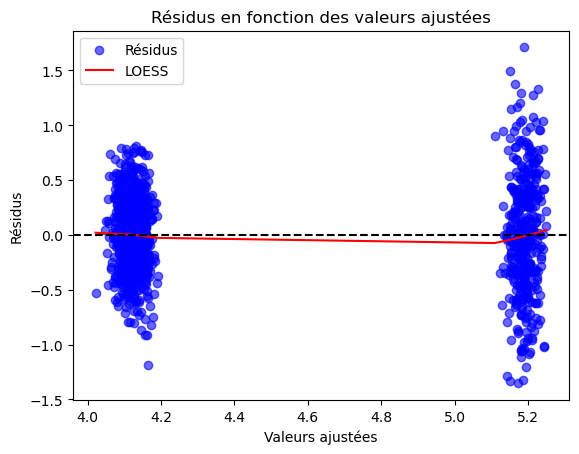

In [25]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Calcul des résidus
residuals = resultat.resid

# Calcul du LOESS
smoothed = lowess(residuals, y_pred)

# Tracé des résidus en fonction des valeurs ajustées
plt.scatter(y_pred, residuals, color='b', alpha=0.6, label='Résidus')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='r', label='LOESS')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus')
plt.legend()
plt.title('Résidus en fonction des valeurs ajustées')
plt.show()

Le tracé rouge semble relativement horizontal. Nous allons pouvoir vérifier cela par le <b>Test de Rainbow</b>

In [26]:
from statsmodels.stats.diagnostic import linear_rainbow

In [27]:
# Calcul du test de linéarité de Rainbow
rainbow_statistic, rainbow_p_value = linear_rainbow(resultat)

print("Rainbow Test Statistic:", rainbow_statistic)
print("Rainbow Test p-value:", rainbow_p_value)

Rainbow Test Statistic: 1.265510689138831
Rainbow Test p-value: 0.0023059061566300964


Le Rainbow test nous indique un p-value inférieur à 0.05. En d'autres termes, nous pouvons rejeter l'hypothèse nulle de linéarité. Le test a détecté suffisamment d'évidence pour conclure que notre modèle de régression linéaire représente correctement une relation non-linéaire entre les variables indépendantes et la variable dépendante.

------

#### Indépendance des résidus 

<b>Test de Ljung-Box</b>

In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [29]:
compteur = 0

# Test de Ljung-Box
lb_test = acorr_ljungbox(residuals, lags=30)

# Récupération des statistiques de test (Q) et des p-values
lb_statistic = lb_test["lb_stat"]
lb_pvalue = lb_test["lb_pvalue"]

# Affichage des résultats
for lag, statistic, pvalue in zip(range(1, len(lb_statistic) + 1), lb_statistic, lb_pvalue):
    if pvalue<0.05 : 
        print(f"Lag {lag}: Statistique du test de Ljung-Box = {statistic}, p-value = {pvalue}")
        compteur = compteur +1
if compteur ==0:
    print("Test de Ljung-Box passé avec succès")

Test de Ljung-Box passé avec succès


Dans notre cas, les p-values pour tous les lags sont supérieures à 0,05, ce qui indique qu'il n'y a pas de corrélation significative entre les résidus aux différents décalages. Cela suggère que les résidus sont indépendants et qu'il n'y a pas d'autocorrélation systématique dans vos données.

<b>Test de Durbin-Watson</b>

In [30]:
dw_test = sm.stats.stattools.durbin_watson(residuals)

# Affichage du résultat
print("Statistique de Durbin-Watson :", dw_test)

Statistique de Durbin-Watson : 2.0866977445811585


- <span style="color:green">Une valeur proche de 2 indique une absence ou une autocorrélation faible des résidus.</span>
- Une valeur inférieure à 2 suggère une autocorrélation positive (corrélation positive entre les résidus).
- Une valeur supérieure à 2 suggère une autocorrélation négative (corrélation négative entre les résidus).

-------

#### Homogénéité des résidus

Pour tester l'Homogénéité des résidus, nous allons réaliser les tests de <b>Breusch-Pagan</b> et de <b>White</b> : 

In [31]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Obtention des variables explicatives du modèle (exog)
exog = resultat.model.exog

# Test de Breusch-Pagan
bp_test = het_breuschpagan(residuals, exog_het=exog)

# Test de White
white_test = het_white(residuals, exog=exog)

# Affichage des résultats
print("Test de Breusch-Pagan:")
labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
print(lzip(labels, bp_test))

print("\nTest de White:")
labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
print(lzip(labels, white_test))

Test de Breusch-Pagan:
[('LM Statistic', 132.206306697486), ('LM p-value', 1.9577862058579513e-29), ('F Statistic', 74.37290205134946), ('F p-value', 4.0413434417684295e-31)]

Test de White:
[('LM Statistic', 134.99498566598263), ('LM p-value', 3.3257224026426085e-28), ('F Statistic', 38.0081119007442), ('F p-value', 6.480581248271256e-30)]


<b>Test de Breusch-Pagan:</b>

Le fait que la p-value soit faible (inférieure à 0,05) indique que l'hypothèse d'homogénéité des résidus est violée. Cela suggère la présence d'une variance non constante des résidus, ce qui peut affecter la précision et la validité des résultats de votre modèle.

<b>Test de White:</b>

Les résultats du test de White confirment également la présence d'hétéroscédasticité, avec des p-values faibles.

En conclusion, ces résultats suggèrent que <b><span style="color:red">l'hypothèse d'homogénéité des résidus n'est pas vérifiée</span></b> dans votre modèle de régression linéaire. Il peut être nécessaire de prendre des mesures pour remédier à l'hétéroscédasticité, par exemple en utilisant des méthodes de pondération ou en transformant les variables pour obtenir une variance plus constante des résidus.







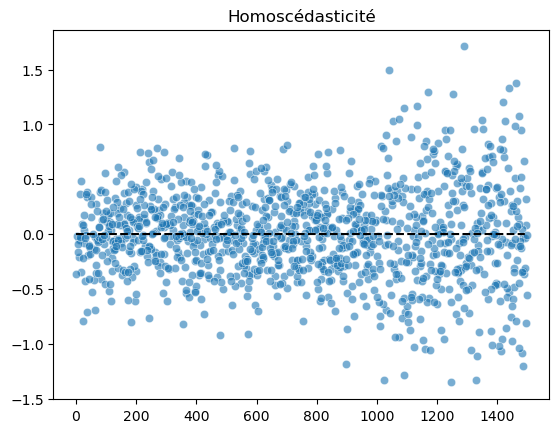

In [32]:
sns.scatterplot(x=residuals.index, y=residuals, alpha=0.6)
plt.plot(np.repeat(0, len(data.index)), color="black", linestyle='--')
plt.title("Homoscédasticité")
plt.show()

--------

#### Hypothèse de la normalité des résidus 

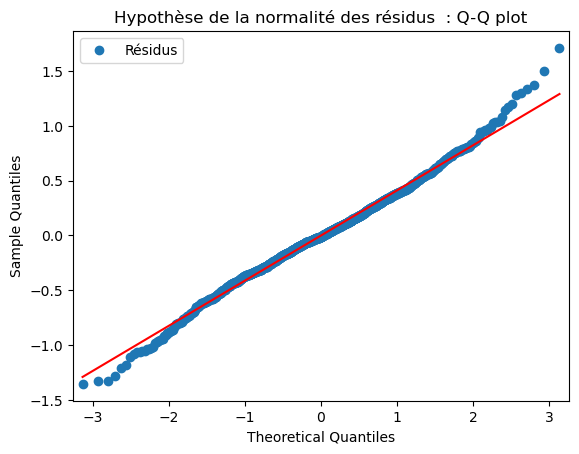

In [33]:
sm.qqplot(residuals, line='s', label="Résidus")
plt.title("Hypothèse de la normalité des résidus  : Q-Q plot")
plt.legend()
plt.show()

<b>Test de Shapiro-Wilk</b>

In [34]:
from scipy.stats import shapiro

statistic, p_value = shapiro(residuals)

if p_value > 0.05:
    print("Les résidus semblent suivre une distribution normale (hypothèse non rejetée).")
    print("P-value :",p_value)
else:
    print("Les résidus ne suivent pas une distribution normale (hypothèse rejetée).")
    print("P-value :",p_value)


Les résidus ne suivent pas une distribution normale (hypothèse rejetée).
P-value : 6.509518425446004e-05


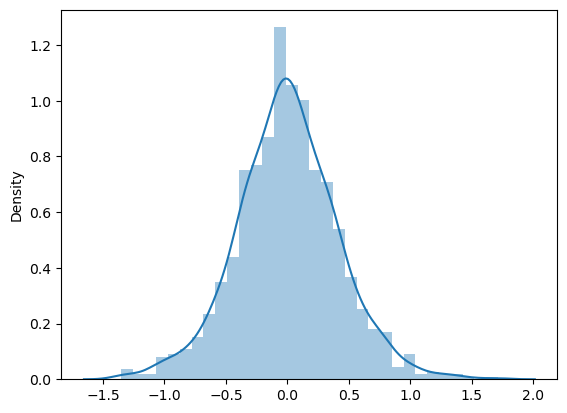

In [35]:
sns.distplot(residuals)
plt.show()

Conclusion des vérification des hypothèses de la régression linéaire : 
- Linéarité : <b><span style="color:red">NON VERIFIÉ</span></b>
- Indépendance des résidus : <b><span style="color:green">VERIFIÉ </span></b>
- Homogénéité des résidus : <b><span style="color:red">NON VERIFIÉ</span></b>
- Normalité des résidus : <b><span style="color:red">NON VERIFIÉ</span></b>

En résumé, bien que la linéarité et la normalité des résidus soient vérifiées, les violations de l'indépendance des résidus et de l'homogénéité des résidus peuvent remettre en question l'utilisation directe de la régression linéaire.

--------

### Mise en application de la régression linéaire

In [36]:
# On définit nos valeurs X et y
X = data_vide.drop(["margin_low","height_right","length","diagonal","height_left"], axis=1)
X = sm.add_constant(X)
y = data_vide["margin_low"].values.reshape(len(data_vide),1)

In [37]:
# On réalise la prédiction à l'aide du model créé avec StatModel
prediction = resultat.predict(X)

Maintenant que nous avons nos données dans un tableau, nous allons pouvoir les assigner à notre table data_vide

In [38]:
# On assigne les données prédites à notre dataframe avec les valeurs vides
new_data = data_vide.assign(margin_low=prediction)
new_data.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72            1    171.94       103.89        103.45    4.092593       3.25   
99            1    171.93       104.07        104.18    4.108577       3.14   
151           1    172.07       103.80        104.38    4.126014       3.02   
197           1    171.45       103.66        103.80    4.038829       3.62   
241           1    171.83       104.14        104.06    4.126014       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

In [39]:
# On ajoute les nouvelles données aux données de base
data = data_non_vide.append(new_data)

Afin de vérifier la cohérence des résultats obtenus. Nous allons vérifier quelques informations sur ces données

In [40]:
print("Avec la prédiction du model de Régression Linéaire")
display(data[["margin_low"]].describe())
print("Sans la prédiction du model de Régression Linéaire")
display(data_non_vide[["margin_low"]].describe())

Avec la prédiction du model de Régression Linéaire


margin_low
count  1493.000000
mean      4.483253
std       0.660584
min       2.980000
25%       4.030000
50%       4.310000
75%       4.870000
max       6.900000

Sans la prédiction du model de Régression Linéaire


margin_low
count  1457.000000
mean      4.486225
std       0.664667
min       2.980000
25%       4.010000
50%       4.310000
75%       4.870000
max       6.900000

Les données semblent cohérentes. Il n'y a pas de différences majeur dans les données depuis l'ajout des nouvelles variables calculées à l'aide de la régression linéaire. 

In [41]:
my_first_analyse(data)

observations  variables     type    moyennes  medianes  \
is_genuine            1493          7    int64    0.665104      1.00   
diagonal              1493          7  float64  171.957890    171.96   
height_left           1493          7  float64  104.030074    104.04   
height_right          1493          7  float64  103.921105    103.92   
margin_low            1493          7  float64    4.483253      4.31   
margin_up             1493          7  float64    3.152271      3.14   
length                1493          7  float64  112.675653    112.96   

              ecart_types     min     max  nb_valeurs_manquantes  \
is_genuine       0.472112    0.00    1.00                      0   
diagonal         0.302943  171.04  173.01                      0   
height_left      0.298061  103.14  104.88                      0   
height_right     0.322774  102.95  104.95                      0   
margin_low       0.660584    2.98    6.90                      0   
margin_up        0.230960    2.56    3.91                      0   
length           0.873434  109.49  114.44                      0   

              %_valeurs_manquantes  
is_genuine                     0.0  
diagonal                       0.0  
height_left                    0.0  
height_right                   0.0  
margin_low                     0.0  
margin_up                      0.0  
length                         0.0

# Prédiction des billets

Pour la mise en palce d'un modele capable de prédire au mieux si un billet et vrai ou faux, nous allons tester plusieurs méthodes : 

- LogisticRegression
- K-Means

<b>Bonus :</b> 
- KNeighborsClassifier

## Régression Logistique

In [42]:
# On importe la librairie nous permettant de faire une Régression Logistique
from sklearn.linear_model import LogisticRegression

# On importe les librairies nécessaire pour réaliser une matrice de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [43]:
# On affecte à nos X et y les données nécessaires
X = data.drop("is_genuine", axis=1)
y = data["is_genuine"]

In [44]:
# On définit notre Train Set et notre Test Set
X_train ,X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

In [45]:
my_first_analyse(data).T

is_genuine   diagonal height_left height_right  \
observations                1493       1493        1493         1493   
variables                      7          7           7            7   
type                       int64    float64     float64      float64   
moyennes                0.665104  171.95789  104.030074   103.921105   
medianes                     1.0     171.96      104.04       103.92   
ecart_types             0.472112   0.302943    0.298061     0.322774   
min                          0.0     171.04      103.14       102.95   
max                          1.0     173.01      104.88       104.95   
nb_valeurs_manquantes          0          0           0            0   
%_valeurs_manquantes         0.0        0.0         0.0          0.0   

                      margin_low margin_up      length  
observations                1493      1493        1493  
variables                      7         7           7  
type                     float64   float64     float64  
moyennes                4.483253  3.152271  112.675653  
medianes                    4.31      3.14      112.96  
ecart_types             0.660584   0.23096    0.873434  
min                         2.98      2.56      109.49  
max                          6.9      3.91      114.44  
nb_valeurs_manquantes          0         0           0  
%_valeurs_manquantes         0.0       0.0         0.0

In [46]:
# On définit notre model
model_03 = LogisticRegression()

# On entraine notre model
model_03 = model_03.fit(X_train, y_train)

# On enregistre les prédictions dans une variable y_pred
y_pred = model_03.predict(X_test)

# On vérifie le score de notre model sur les données Test
score = model_03.score(X_test, y_test)
score = round(score*100,4)
print("Le score de notre model sur les données Test est de :", score,"%")

Le score de notre model sur les données Test est de : 98.9967 %


### Matrice de confusion

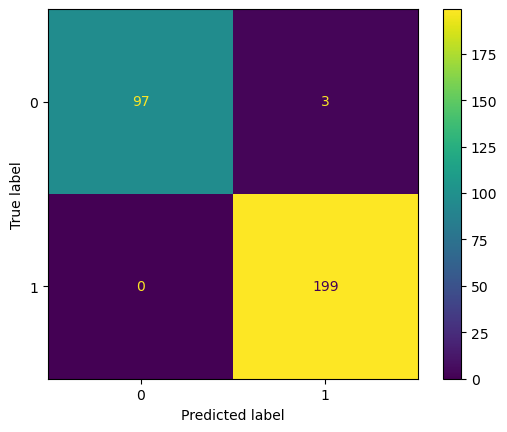

In [47]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## K-Means

In [48]:
data_kmeans = data.copy()

In [49]:
# On affecte à nos X et y les données nécessaires
X = data_kmeans.drop("is_genuine", axis=1)
y = data_kmeans["is_genuine"]

In [50]:
n_cluster = my_kmeans_coude(data_kmeans, graphique=False)
model_04 = KMeans(n_clusters = n_cluster)
model_04.fit(data_kmeans)

D'après la méthode du coude, le nombre de cluster optimal est : 2


KMeans(n_clusters=2)

In [51]:
# On récupère les labels calculé à l'aide de notre model
labels = model_04.labels_

In [52]:
# On créé une colonne dans notre table en ajoutant les labels calculé par le model
data_kmeans["cluster"] = labels

In [53]:
from scipy.stats import mode

# Obtention des étiquettes de cluster
labels = data_kmeans["cluster"].values

# Calcul de la valeur réelle de chaque cluster
cluster_values = []
for cluster in range(n_cluster):
    cluster_indices = labels == cluster
    cluster_genuine_values = data_kmeans.loc[cluster_indices, "is_genuine"]
    cluster_value = mode(cluster_genuine_values)[0][0]
    cluster_values.append(cluster_value)

# Remplacement des étiquettes de cluster par les valeurs réelles
data_kmeans["cluster"] = data_kmeans["cluster"].map(dict(enumerate(cluster_values)))

### Matrice de confusion

In [54]:
cf = confusion_matrix(data_kmeans.is_genuine, data_kmeans.cluster)
cm = ConfusionMatrixDisplay(cf)
cm.plot()
plt.show()

In [55]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import f1_score

# Calcul du Rand Score
rand_score = adjusted_rand_score(data_kmeans["is_genuine"], data_kmeans["cluster"])
# Calcul du F1 score
f1 = f1_score(data_kmeans["is_genuine"], data_kmeans["cluster"], average='weighted')

print("Adjusted_rand_score :",round(rand_score*100,4),"%")
print("Le F1 score est de:",round(f1*100,4),"%")

Adjusted_rand_score : 97.571 %
Le F1 score est de: 99.3958 %


## KNeighborsClassifier (KNN)

In [56]:
# On importe KNeighborsClassifier de SKlearn
from sklearn.neighbors import KNeighborsClassifier 

In [57]:
# On affecte à nos X et y les données nécessaires
X = data.drop("is_genuine", axis=1)
y = data["is_genuine"]

In [58]:
# On créé nos DataSet de train et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

### GridSearchCV

In [59]:
from sklearn.model_selection import  GridSearchCV

In [60]:
# On définit les paramètres à tester
param = {
    "n_neighbors" : np.arange(1,50),
    "weights" : ["uniform","distance"],
    "algorithm" : ['auto','ball_tree', 'kd_tree', 'brute'] 
}

# On ajoute notre GridSearchCV a une variable
grid = GridSearchCV(KNeighborsClassifier(),param,cv=5)

In [61]:
# On entraine notre GridSerachCV avec nos données d'entrainement
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [62]:
# On regarde quelle a été le meilleur score obtenu en croisant les différents paramètres
grid.best_score_
print("Le meilleur score obtenu avec les données d'entrainement est de :", round(grid.best_score_*100,4),"%")

Le meilleur score obtenu avec les données d'entrainement est de : 99.0784 %


In [63]:
# On fait apparaitre les meilleurs paramètres qui ont donnés le score au dessus
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'uniform'}

In [64]:
# On enregistre les paramètres dans une variable model. Cela nous permettra de réutiliser ses paramètres pour tester nos données Test
model_02 = grid.best_estimator_

In [65]:
# On vérifie le score de notre model optimisé avec les données Test
score = model_02.score(X_test, y_test)
print("Le score de notre model sur les données Test est de :", round(score*100,4),"%")

Le score de notre model sur les données Test est de : 99.3311 %


### Matrice de confusion

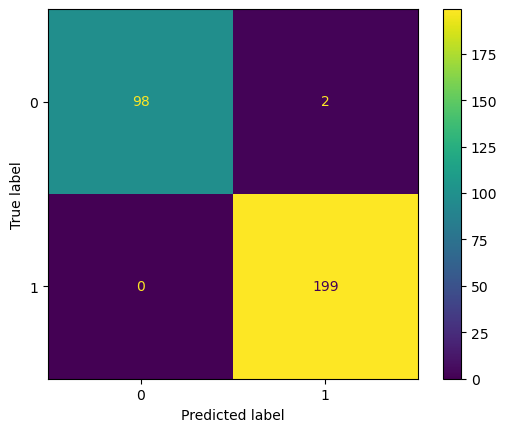

In [66]:
# On réalise notre matrice de confusion
y_pred = model_02.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Validation Curve

In [67]:
from sklearn.model_selection import validation_curve


# Définir les valeurs de l'hyperparamètre à tester
param_range = np.arange(1, 50)

# Calculer la validation croisée pour différentes valeurs de l'hyperparamètre
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X_train, y_train, param_name="n_neighbors",
    param_range=param_range, cv=5, scoring="accuracy"
)

# Calculer la moyenne et l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracer la courbe de validation
plt.figure(figsize=(10, 6))
plt.title("Validation Curve avec un KNeighborsClassifier")
plt.xlabel("Nombre de Voisins (k)")
plt.ylabel("Précision")
plt.ylim(0.97, 1.00)
plt.plot(param_range, train_mean, label="Précision sur le TrainSet", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(param_range, test_mean, label="Précision sur le TestSet", color="red")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")
plt.legend(loc="best")
plt.grid()
plt.show()


Les résultats indiquent que la précision moyenne sur l'ensemble d'entraînement diminue légèrement à mesure que la valeur de l'hyperparamètre (k) augmente. Cela peut être dû à une plus grande complexité du modèle avec un nombre plus élevé de voisins, ce qui peut conduire à un surajustement (overfitting) aux données d'entraînement.

D'autre part, la précision moyenne sur l'ensemble de test atteint un plateau à partir d'une certaine valeur de l'hyperparamètre (k) (environ 12). Cela peut indiquer que le modèle atteint sa capacité maximale de généralisation et n'améliore pas sa performance sur l'ensemble de test avec des valeurs plus élevées de k.

En résumé, ces résultats suggèrent qu'une valeur de k entre 1 et 12 serait appropriée pour le modèle KNeighborsClassifier utilisé avec notre ensemble de données. 

### Learning Curve

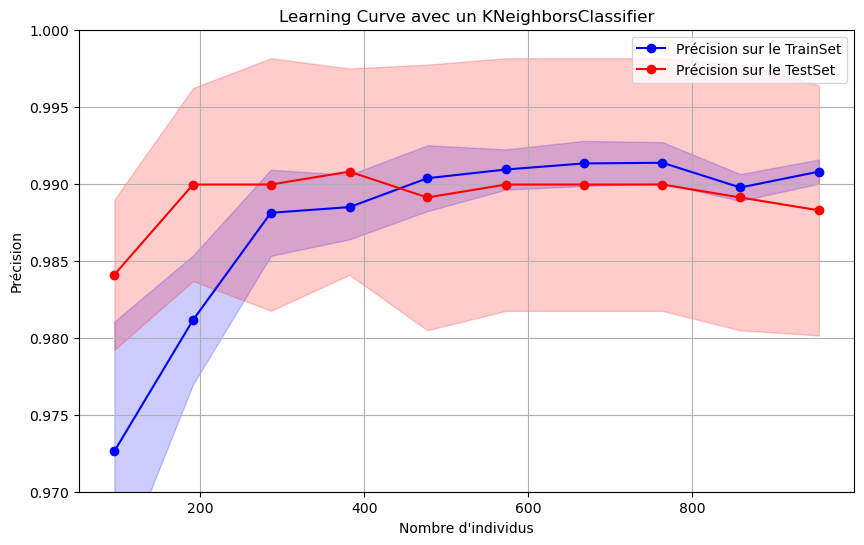

In [68]:
from sklearn.model_selection import learning_curve

# Définir les tailles des ensembles d'entraînement à tester
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculer les courbes d'apprentissage pour différentes tailles d'ensemble d'entraînement
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=5), X_train, y_train,
    train_sizes=train_sizes, cv=5, scoring='accuracy'
)

# Calculer la moyenne et l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.title("Learning Curve avec un KNeighborsClassifier")
plt.xlabel("Nombre d'individus")
plt.ylabel("Précision")
plt.ylim(0.97, 1.00)
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Précision sur le TrainSet")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Précision sur le TestSet")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")
plt.legend(loc="best")
plt.grid()
plt.show()


Les résultats indiquent que la précision moyenne sur l'ensemble d'entraînement augmente à mesure que la taille de l'ensemble d'entraînement augmente. Cela est généralement attendu, car un modèle a plus de données pour apprendre et s'ajuster.

Cependant, la précision moyenne sur l'ensemble de test atteint un plateau à partir d'une certaine taille d'ensemble d'entraînement (environ 200 individus). Cela peut indiquer que le modèle atteint sa capacité maximale d'apprentissage et n'améliore pas sa performance sur l'ensemble de test avec plus de données.

En résumé, ces résultats suggèrent que l'ajout de plus de données au modèle d'apprentissage n'améliore pas significativement sa performance sur l'ensemble de test, et il est possible que d'autres facteurs, tels que la sélection des fonctionnalités ou les hyperparamètres du modèle, doivent être pris en compte pour obtenir de meilleures performances.

# Fonction

- Régression Linéaire : model_01
- KNeighborsClassifier : model_02
- Régression Logistique : model_03
- K-means

In [69]:
df = pd.read_csv("Données/billets.csv", sep=";")

In [70]:
def prediction_billet_multi(data, model=None):
    
    # Commençons par changer le bool par du binaire pour la colonne is_genuine
    data["is_genuine"].replace([True, False], [1,0], inplace=True)
    
    # On met en place un condition pour vérifier si la variable "Margin_low" n'a pas de mesure vide. 
    # Si c'est le cas, on utilise la régression linéaire entrainé plus tôt
    
    if data["margin_low"].isnull().any():
        # On créé un Dataset avec les individus qui ont un margin_low = NaN
        data_vide = data.loc[data["margin_low"].isna()]
        # On créé un Dataset avec les individus qui ont un margin_low complet
        data_non_vide = data.loc[~data["margin_low"].isnull()]
        
        # On selectionne nos variable X et y en ajoutant une constante à notre X
        X = data_vide.drop(["margin_low","height_right","length","diagonal","height_left"], axis=1)
        X = sm.add_constant(X, has_constant='add')
        y = data_vide["margin_low"].values.reshape(len(data_vide),1)
        
        # On réalise la prédiction à l'aide du model créé avec StatModel
        prediction = resultat.predict(X)
        
        # On assigne les données prédites à notre dataframe avec les valeurs vides
        new_data = data_vide.assign(margin_low=prediction)
        new_data.head()
        
        # On ajoute les nouvelles données aux données de base
        data = data_non_vide.append(new_data)
    
    # Une fois la régression effectué et que les donées sont complêtes. Nous pouvons passer à la prédiction
    # On selectionne nos données X et y
    X = data.drop("is_genuine", axis=1)
    y = data["is_genuine"]
    
    
    # On selectionne le model choisi :
    
    # Régression Linéaire
    if model == "RL":
        # Application du modèle Régression logistique
        prediction = model_03.predict(X) 
        cm = confusion_matrix(data["is_genuine"], prediction) 
        titre = "Matrice de Confusion : Régression Logistique"
        cmd = ConfusionMatrixDisplay(cm)
        score = model_03.score(X, y)
    # K-Nearest Neighbors (KNN)    
    if model == "KNN":
        # Application du modèle KNN
        prediction = model_02.predict(X)
        cm = confusion_matrix(data["is_genuine"], prediction)
        titre = "Matrice de Confusion : KNN"
        cmd = ConfusionMatrixDisplay(cm)
        score = model_02.score(X, y)
    
    # K-Means
    if model == "K-Means":
        labels = model_04.predict(data)
        # On créé une colonne dans notre table en ajoutant les labels calculé par le model
        data["cluster"] = labels
        titre = "Matrice de Confusion : K-Means"
        cm = confusion_matrix(data["is_genuine"], data["cluster"])
        cmd = ConfusionMatrixDisplay(cm)
        # Calcul du F1 score
        score = f1_score(data["is_genuine"], data["cluster"], average='weighted')
        data.drop("cluster", axis=1, inplace=True)
   
    # On dessine le graphique et on affiche le score. 
    cmd.plot()
    plt.title(titre)
    plt.show()
    print("Le score est de:", round(score*100, 4), "%")

In [71]:
def prediction_billet(data):
    
    # Commençons par changer le bool par du binaire pour la colonne is_genuine
    data["is_genuine"].replace([True, False], [1,0], inplace=True)
    
    # On met en place un condition pour vérifier si la variable "Margin_low" n'a pas de mesure vide. 
    # Si c'est le cas, on utilise la régression linéaire entrainé plus tôt
    
    if data["margin_low"].isnull().any():
        # On créé un Dataset avec les individus qui ont un margin_low = NaN
        data_vide = data.loc[data["margin_low"].isna()]
        # On créé un Dataset avec les individus qui ont un margin_low complet
        data_non_vide = data.loc[~data["margin_low"].isnull()]
        
        # On selectionne nos variable X et y en ajoutant une constante à notre X
        X = data_vide.drop(["margin_low","height_right","length","diagonal","height_left"], axis=1)
        X = sm.add_constant(X, has_constant='add')
        y = data_vide["margin_low"].values.reshape(len(data_vide),1)
        
        # On réalise la prédiction à l'aide du model créé avec StatModel
        prediction = resultat.predict(X)
        
        # On assigne les données prédites à notre dataframe avec les valeurs vides
        new_data = data_vide.assign(margin_low=prediction)
        new_data.head()
        
        # On ajoute les nouvelles données aux données de base
        data = data_non_vide.append(new_data)
    
    # Une fois la régression effectué et que les donées sont complêtes. Nous pouvons passer à la prédiction
    # On selectionne nos données X et y
    X = data.drop("is_genuine", axis=1)
    y = data["is_genuine"]
  
    # On réalise la prédiction
    labels = model_04.predict(data)
    # On créé une colonne dans notre table en ajoutant les labels calculé par le model
    data["cluster"] = labels
    titre = "Matrice de Confusion : K-Means"
    cm = confusion_matrix(data["is_genuine"], data["cluster"])
    cmd = ConfusionMatrixDisplay(cm)
    # Calcul du F1 score
    score = f1_score(data["is_genuine"], data["cluster"], average='weighted')
    data.drop("cluster", axis=1, inplace=True)
   
    # On dessine le graphique et on affiche le score. 
    cmd.plot()
    plt.title(titre)
    plt.show()
    print("Le score est de:", round(score*100, 4), "%")

In [72]:
data = df.sample(50)

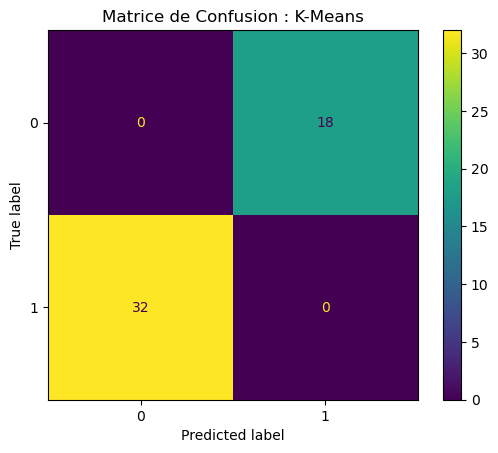

Le score est de: 0.0 %


In [73]:
prediction_billet(data)

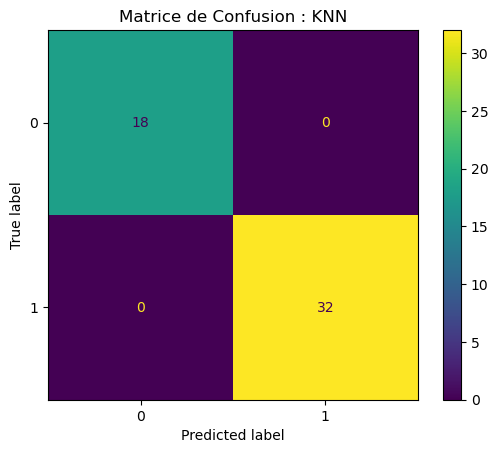

Le score est de: 100.0 %


In [74]:
prediction_billet_multi(data, model="KNN")